In [1]:
dataAll <- read.csv("maindata.csv", header=TRUE)

In [2]:
head(dataAll)

ï..Site,PeriodCode,SimpPeriodCode,SiteNum,Lagomorpha,Artiodactyla,Rodentia
Los Pozos - Sweetwater Locus,1,A,AZ AA:12:91 (ASM),0.7846154,0.18461538,0.03076923
Arroyo Site,1,A,AZ AA:3:28 (ASM),0.8955224,0.08955224,0.01492537
Gate Site,1,A,AZ AA:3:8 (ASM),0.9111111,0.02222222,0.06666667
Lookout Site,1,A,AZ S:7:30 (ASM),0.9218750,0.01562500,0.06250000
Willow Ridge Site,2,A,AZ AA:12:968 (ASM),0.2702703,0.71171171,0.01801802
Valley Farms,2,A,?,0.6525424,0.14406780,0.20338983


### Full Data Centroid:

In [3]:
centroidTotal = c(mean(dataAll$Lagomorpha), mean(dataAll$Artiodactyla), mean(dataAll$Rodentia))
centroidTotal

[1] 0.7718925 0.1214876 0.1066200

In [4]:
periodA = subset(dataAll, SimpPeriodCode == "A")

In [5]:
periodB = subset(dataAll, SimpPeriodCode == "B")

In [6]:
periodC = subset(dataAll, SimpPeriodCode == "C")

In [7]:
periodD = subset(dataAll, SimpPeriodCode == "D")

### Middle and Late Archaic Centroid:

In [8]:
centroidA = c(mean(periodA$Lagomorpha), mean(periodA$Artiodactyla), mean(periodA$Rodentia))
centroidA

[1] 0.81422837 0.13074305 0.05502857

### Pioneer, Early Ceramic, and Colonial Centroid:

In [9]:
centroidB = c(mean(periodB$Lagomorpha), mean(periodB$Artiodactyla), mean(periodB$Rodentia))
centroidB

[1] 0.84061002 0.06940074 0.08998923

### Sedentary Centroid:

In [10]:
centroidC = c(mean(periodC$Lagomorpha), mean(periodC$Artiodactyla), mean(periodC$Rodentia))
centroidC

[1] 0.7216639 0.1415149 0.1368212

### Classic Centroid:

In [11]:
centroidD = c(mean(periodD$Lagomorpha), mean(periodD$Artiodactyla), mean(periodD$Rodentia))
centroidD

[1] 0.7452644 0.1354500 0.1192855

In [12]:
library("ggtern")
options(warn = -1)  #The stuff below produces an insane amount of warning messages - be careful that real problems aren't being hidden by this!

Loading required package: ggplot2
--
Consider donating at: http://ggtern.com
Even small amounts (say $10-50) are very much appreciated!
Remember to cite, run citation(package = 'ggtern') for further info.
--

Attaching package: 'ggtern'

The following objects are masked from 'package:ggplot2':

    aes, annotate, calc_element, ggplot, ggplot_build, ggplot_gtable,
    ggplotGrob, ggsave, layer_data, layer_grob, layer_scales, theme,
    theme_bw, theme_classic, theme_dark, theme_get, theme_gray,
    theme_light, theme_linedraw, theme_minimal, theme_set, theme_void



### Full Dataset Ternary Plot

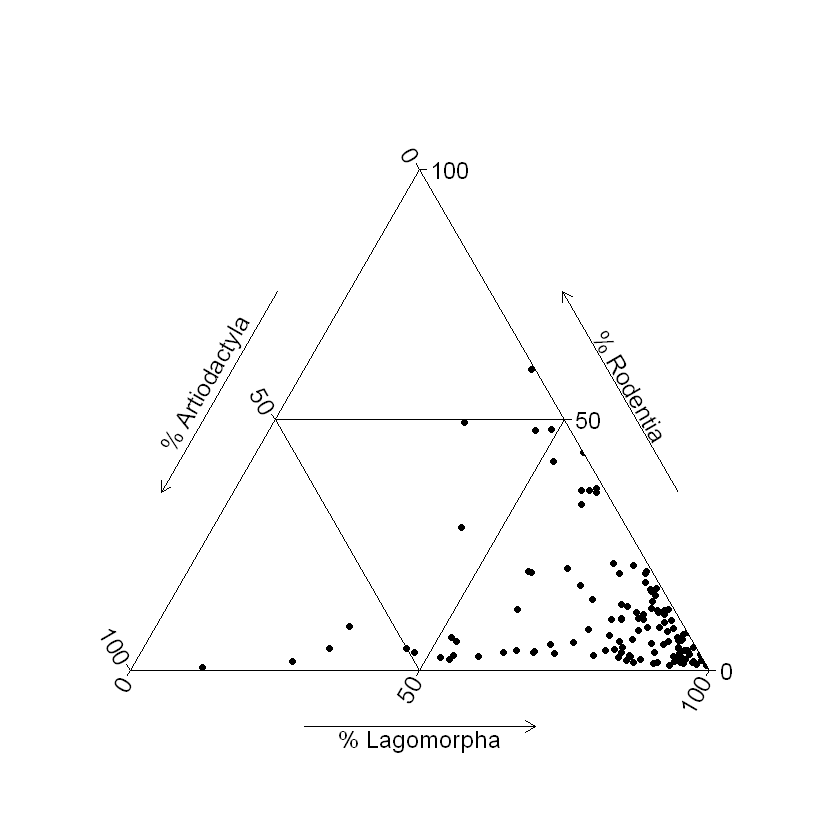

In [13]:
ggtern(data=dataAll,aes(Artiodactyla, Rodentia, Lagomorpha)) + 
geom_point() +
theme_linedraw(base_size = 18, base_family = "") +
scale_T_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_R_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_L_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
Tarrowlab("% Rodentia") + Rarrowlab("% Lagomorpha") + Larrowlab("% Artiodactyla") + theme_showarrows()

In [14]:
ps = c("A", "B", "C", "D", "T")
ls = c(centroidA[1], centroidB[1], centroidC[1], centroidD[1], centroidTotal[1])
as = c(centroidA[2], centroidB[2], centroidC[2], centroidD[2], centroidTotal[2])
rs = c(centroidA[3], centroidB[3], centroidC[3], centroidD[3], centroidTotal[3])
dfCentroids = data.frame(ps, as, rs, ls)
dfCentroids

ps,as,rs,ls
A,0.13074305,0.05502857,0.8142284
B,0.06940074,0.08998923,0.8406100
C,0.14151493,0.13682120,0.7216639
D,0.13545005,0.11928552,0.7452644
T,0.12148757,0.10661996,0.7718925


### Centroids for time periods (and overall) Plot

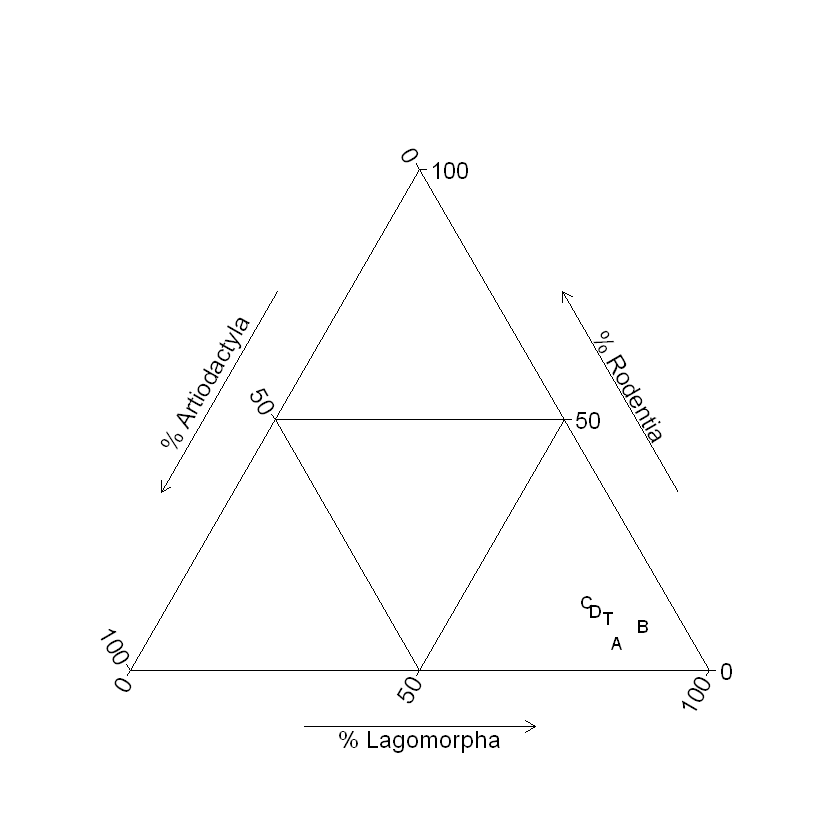

In [15]:
ggtern(data=dfCentroids,aes(as, rs, ls, label=ps)) + 
geom_text() +
theme_linedraw(base_size = 18, base_family = "") +
scale_T_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_R_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_L_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
Tarrowlab("% Rodentia") + Rarrowlab("% Lagomorpha") + Larrowlab("% Artiodactyla") + theme_showarrows()

### Time Period Plots

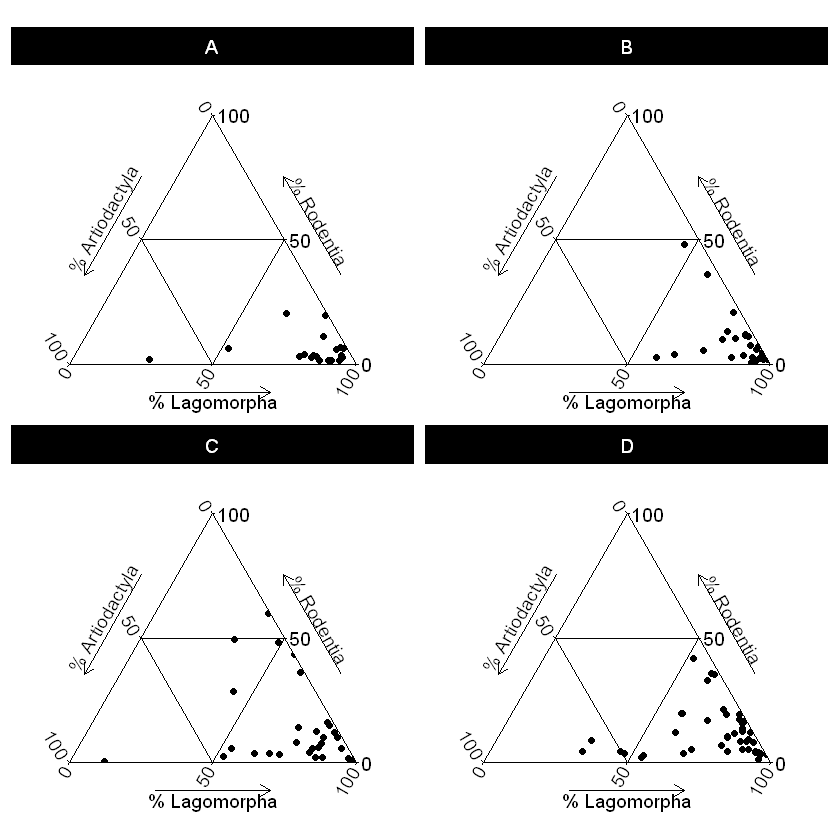

In [16]:
ggtern(data=dataAll,aes(Artiodactyla, Rodentia, Lagomorpha)) + 
geom_point() +
facet_wrap("SimpPeriodCode") +
theme_linedraw(base_size = 14, base_family = "") +
scale_T_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_R_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
scale_L_continuous(name = "", limits = c(0,1), breaks = c(0, .5, 1), minor_breaks = NULL, labels = c("0", "50", "100")) +
Tarrowlab("% Rodentia") + Rarrowlab("% Lagomorpha") + Larrowlab("% Artiodactyla") + theme_showarrows()


## Add distance from centroid column

In [17]:
dataAll$distance <- sqrt((dataAll$Lagomorpha - centroidTotal[1])^2 + (dataAll$Artiodactyla - centroidTotal[2])^2 + (dataAll$Rodentia - centroidTotal[3])^2)

In [18]:
head(dataAll)

ï..Site,PeriodCode,SimpPeriodCode,SiteNum,Lagomorpha,Artiodactyla,Rodentia,distance
Los Pozos - Sweetwater Locus,1,A,AZ AA:12:91 (ASM),0.7846154,0.18461538,0.03076923,0.09950039
Arroyo Site,1,A,AZ AA:3:28 (ASM),0.8955224,0.08955224,0.01492537,0.15720089
Gate Site,1,A,AZ AA:3:8 (ASM),0.9111111,0.02222222,0.06666667,0.17558959
Lookout Site,1,A,AZ S:7:30 (ASM),0.9218750,0.01562500,0.06250000,0.18880735
Willow Ridge Site,2,A,AZ AA:12:968 (ASM),0.2702703,0.71171171,0.01801802,0.77964073
Valley Farms,2,A,?,0.6525424,0.14406780,0.20338983,0.15530203


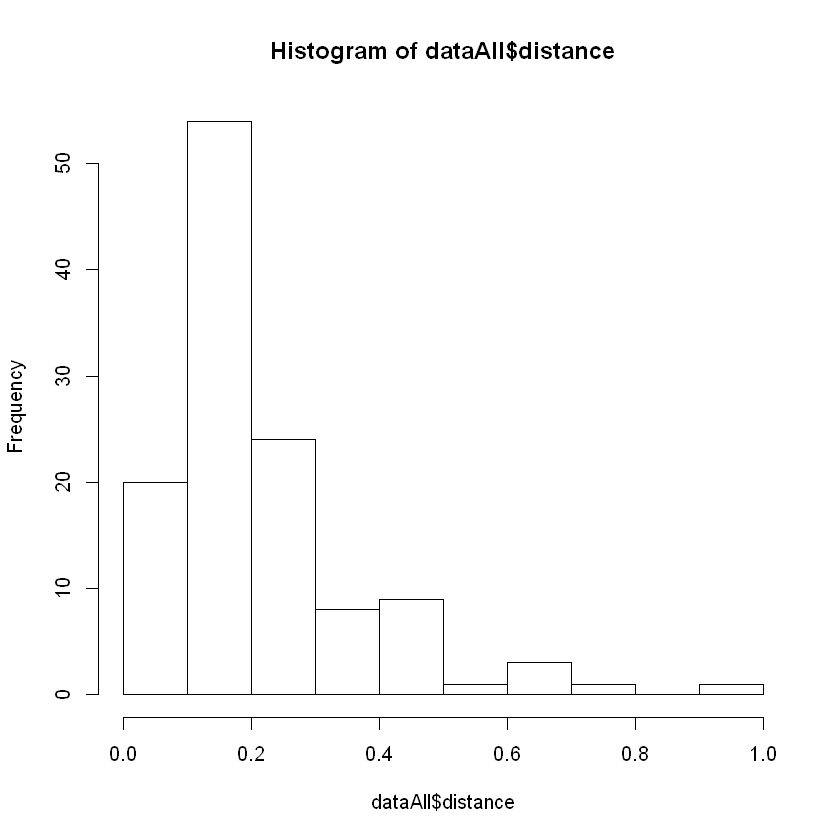

In [19]:
hist(dataAll$distance)